In [17]:
import header as h
import matplotlib.pyplot as plt
import numpy as np

In [34]:
def get_power_data( file ):
    power = []
    with open( file , 'r') as myfile:
        while( True ):
            #Getting file data line-by-line.
            data = myfile.readline()
            #Check end of file.
            if len(data) == 0:
                break
            power.append(float(data[:len(data)-1]))
    return power

def TheroreticalFreq(power, e_sqrd_radius = 50.0e-6, transition_wavelength = 461.0e-9 , laser_wavelength = 1064.0e-9, mass = 87*1.66e-27, transition_linewidth = 30.5e6):
    P_0 = power
    w_0 = e_sqrd_radius
    omega_0 = 2*pi*c/transition_wavelength
    omega   = 2*pi*c/laser_wavelength
    m   = mass*amu2kg
        
    I_0 = 2*P_0/(pi*w_0**2)
    Gamma = 2*pi*transition_linewidth

    co_rotating      = Gamma / (omega_0 - omega)
    counter_rotating = Gamma / (omega_0 + omega)
    contants = 3*pi*c**2/(2*omega_0**3)

    U_0 = I_0 * contants * (co_rotating + counter_rotating)

    return  U_0
            

In [45]:

filePower = "/Users/brianbostwick/Mirror/Cambridge/QMBP_Lab/DipoleTrap_EvapCooling/EvapData/power_distro02.txt"
fileVel = "/Users/brianbostwick/Mirror/Cambridge/QMBP_Lab/DipoleTrap_EvapCooling/EvapData/vel_distro02.txt"
filePos = "/Users/brianbostwick/Mirror/Cambridge/QMBP_Lab/DipoleTrap_EvapCooling/EvapData/pos_distro02.txt"

dt = 1.0e-6
steps = 10000
mass = 87*1.66e-27

power = get_power_data(filePower)

VelData = h.get_particle_data( fileVel )[2]
temp    = h.get_tempeture( VelData, mass )


atom_number = h.get_particle_data( filePos )[1]
# print(atom_number)

print(steps*dt)

t_power = np.linspace(0, steps*dt, len(power))
t_temp  = np.linspace(0, steps*dt, len(temp))


0.01


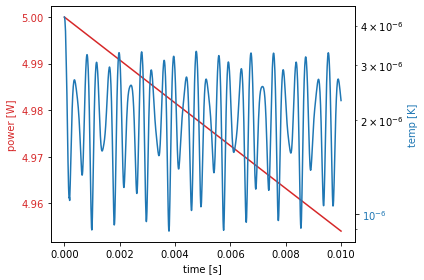

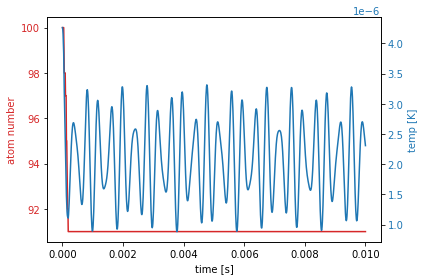

In [46]:

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time [s]')
ax1.set_ylabel('power [W]', color=color)
#ax1.set_yscale('log')
ax1.plot(t_power, power, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('temp [K]', color=color)  # we already handled the x-label with ax1
ax2.set_yscale('log')
ax2.plot(t_temp, temp, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()



fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time [s]')
ax1.set_ylabel('atom number', color=color)
#ax1.set_yscale('log')
ax1.plot(t_temp, atom_number, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('temp [K]', color=color)  # we already handled the x-label with ax1
#ax2.set_yscale('log')
ax2.plot(t_temp, temp, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()